In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

data = pd.read_csv('data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
data['Total_Score'] = data['math score'] + data['reading score'] + data['writing score']

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   Total_Score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


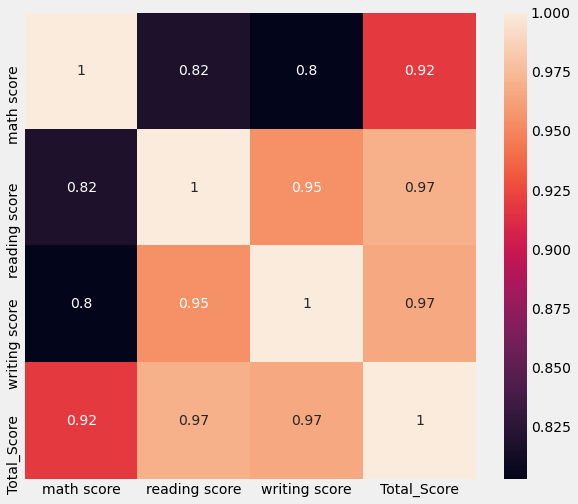

In [4]:
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(), annot=True)

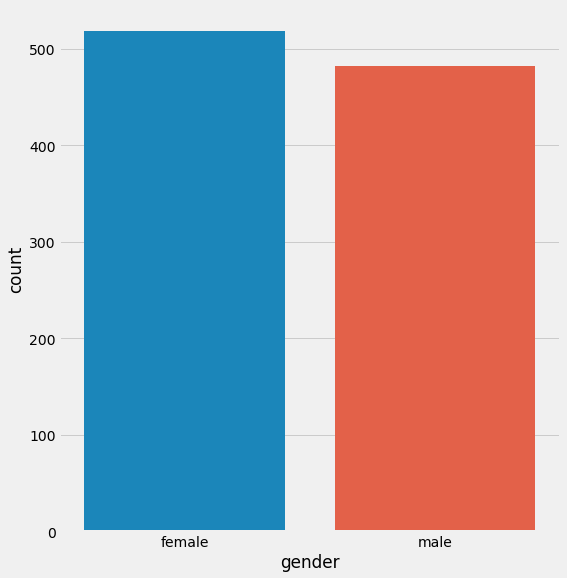

In [5]:
plt.figure(figsize=(8, 9))
sns.countplot(x=data.gender)

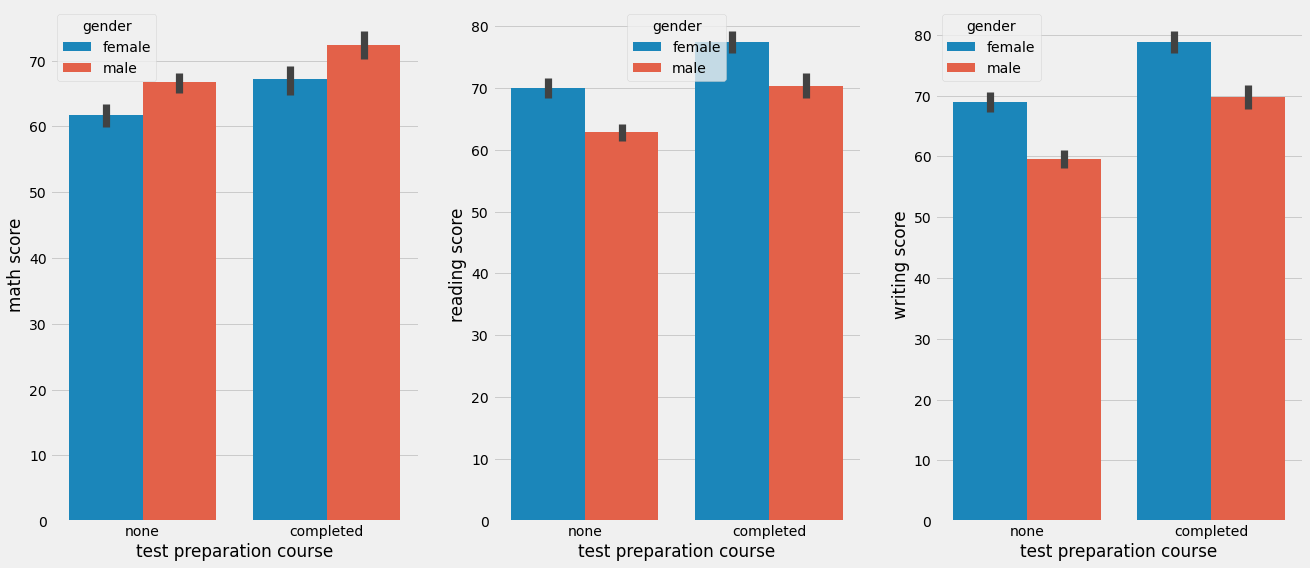

In [6]:
plt.figure(figsize=(20, 30))
plt.subplot(331)
sns.barplot(x='test preparation course', y='math score', data=data, hue='gender')

plt.subplot(332)
sns.barplot(x='test preparation course', y='reading score', data=data, hue='gender')

plt.subplot(333)
sns.barplot(x='test preparation course', y='writing score', data=data, hue='gender')

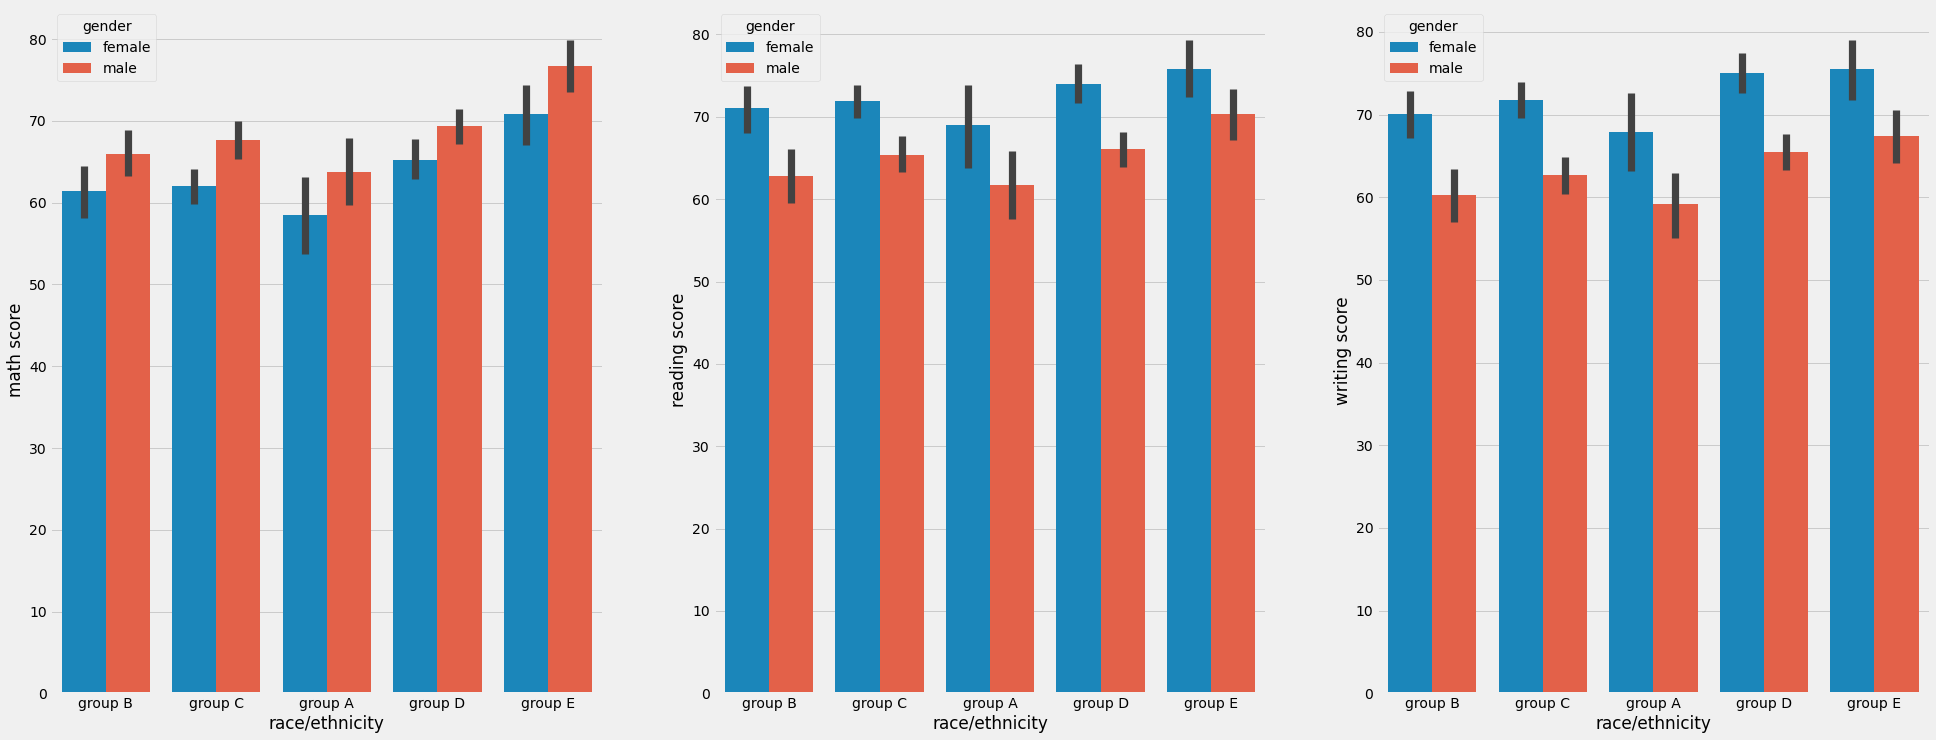

In [7]:
plt.figure(figsize=(30,40))
plt.subplot(331)
sns.barplot(x='race/ethnicity', y='math score', data=data, hue='gender')

plt.subplot(332)
sns.barplot(x='race/ethnicity', y='reading score', data=data, hue='gender')

plt.subplot(333)
sns.barplot(x='race/ethnicity', y='writing score', data=data, hue='gender')


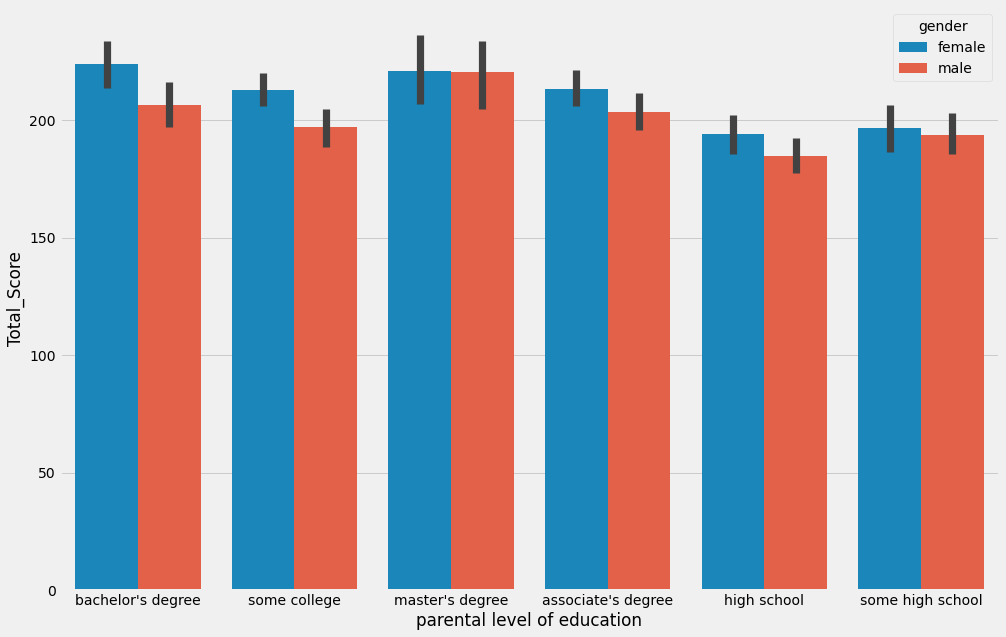

In [8]:
plt.figure(figsize=(15,10))
sns.barplot(x='parental level of education', y='Total_Score', data=data, hue='gender')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   Total_Score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categorical_cols = data.select_dtypes(include='object').columns

for column in categorical_cols:
    data[column] = encoder.fit_transform(data[column])

In [11]:
from sklearn.model_selection import cross_val_score

x = data.drop('writing score', 1)
y = data['writing score']

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]

for model in estimators:
    scores = cross_val_score(estimator= model, X=x, y=y, cv=10)
    print(f'{model} Accuracy: {scores.mean()}')
    print('-'*30)

LinearRegression() Accuracy: 1.0
------------------------------
SVR() Accuracy: 0.8849079252911405
------------------------------
DecisionTreeRegressor() Accuracy: 0.9534924357148016
------------------------------
RandomForestRegressor() Accuracy: 0.976637158031148
------------------------------
